In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn import metrics

import seaborn as sns; sns.set()

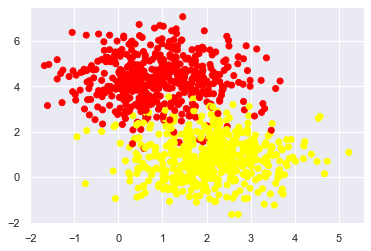

In [2]:
DATA = np.loadtxt('data_SVM.txt')
X = DATA[:,0:2]
y = DATA[:,2]
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

In [3]:
DATA

array([[0.47, 3.87, 0.  ],
       [2.84, 3.33, 0.  ],
       [0.61, 2.51, 0.  ],
       ...,
       [2.08, 0.47, 1.  ],
       [1.44, 2.77, 0.  ],
       [1.47, 4.19, 0.  ]])

(-1.0, 3.5)

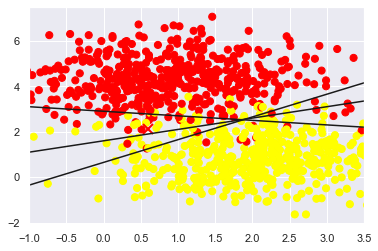

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b, '-k')
plt.xlim(-1,3.5)

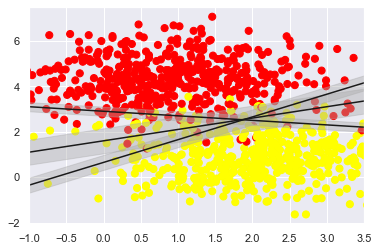

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

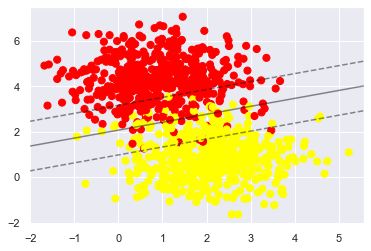

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [10]:
model.support_vectors_

array([[ 2.84,  3.33],
       [ 0.61,  2.51],
       [-0.07,  2.88],
       [-0.36,  2.34],
       [ 0.16,  2.9 ],
       [ 0.16,  2.58],
       [ 2.01,  3.31],
       [ 1.62,  2.73],
       [ 1.83,  3.65],
       [ 1.62,  2.69],
       [ 1.25,  3.41],
       [ 2.38,  3.89],
       [-0.36,  2.96],
       [ 0.04,  3.04],
       [ 1.72,  3.11],
       [ 2.47,  2.23],
       [ 1.6 ,  2.7 ],
       [ 1.65,  3.6 ],
       [ 0.58,  3.14],
       [ 2.86,  2.96],
       [ 0.45,  3.12],
       [ 0.87,  2.64],
       [ 2.06,  3.67],
       [ 1.38,  1.53],
       [ 2.04,  3.85],
       [ 1.02,  2.74],
       [ 0.62,  2.69],
       [ 1.22,  3.42],
       [ 3.28,  3.24],
       [ 0.09,  2.32],
       [ 2.35,  3.79],
       [ 1.28,  2.93],
       [ 1.2 ,  3.29],
       [ 3.32,  3.02],
       [ 2.05,  1.74],
       [ 1.19,  3.1 ],
       [ 0.76,  3.22],
       [ 1.59,  2.96],
       [ 3.57,  3.9 ],
       [ 2.16,  3.67],
       [ 0.87,  3.32],
       [ 0.25,  2.92],
       [ 0.58,  1.26],
       [ 0.

In [11]:
def plot_svm(N=10, ax=None):
    X = DATA[:,0:2]
    y = DATA[:,2]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

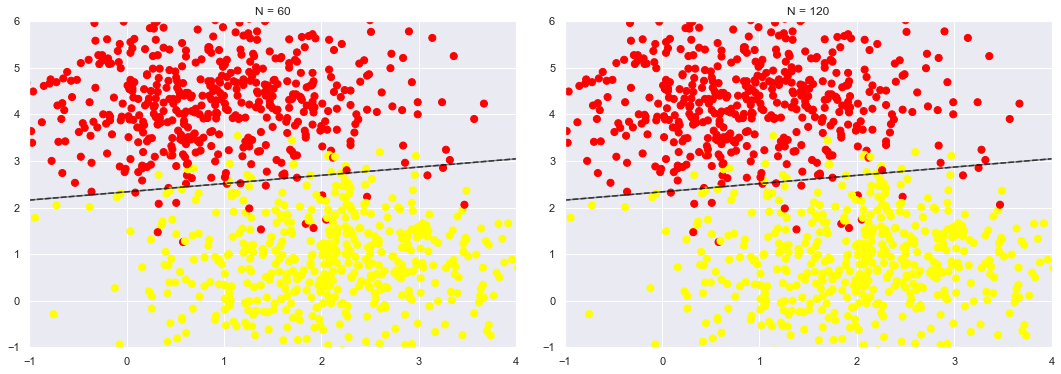

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
len(y)

1000

In [15]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 200), value=10), Output()), _dom_classes=('wi…

In [6]:
c = 0.01
model = SVC(kernel='linear', C=c)
model.fit(X,y)
y_pred = model.predict(X)

Text(0.5, 1.0, 'C = 0.010')

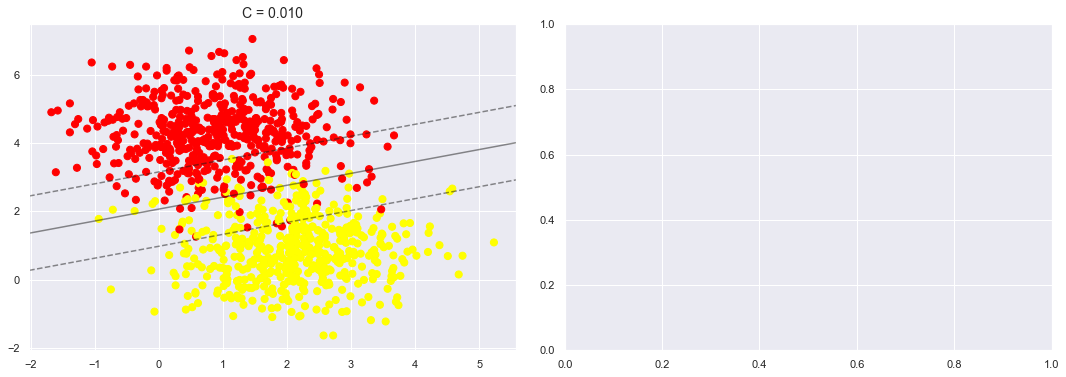

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, ax[0])
ax[0].set_title('C = {0:.3f}'.format(c), size=14)

In [15]:
#Missclassified points
missclassified = []#Create an array of missclassified
i = 0 #Initialize the index
count = 0 #Initialize the count

while i < len(y):
#while i is less than the length of y
    if y[i] != y_pred[i]:
    #if y is not equal to y_pred at index i
        missclassified.append(i)
        #append the index to missclassified
        count += 1
        #increment the count
    i +=1
print('Total number of misclassified points = ', len(missclassified))
#print the total number of missclassified points
print('Percentage of misclassified points = ', len(missclassified)/len(y)*100)
#print the percentage of missclassified points

Total number of misclassified points =  45
Percentage of misclassified points =  4.5


In [17]:
misc = np.subtract(y, y_pred)
#subtract y from y_pred to find the misclassified points
misc



array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

Text(0.5, 1.0, 'misclassified points')

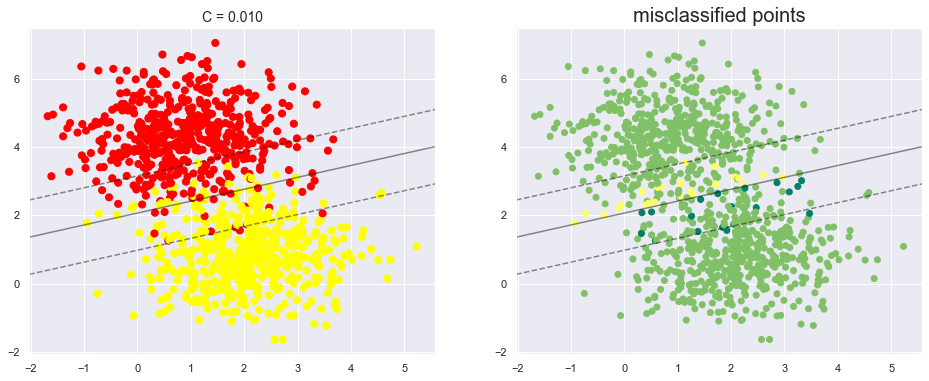

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, ax[0])
ax[0].set_title('C = {0:.3f}'.format(c), size=14)
ax[1].scatter(X[:, 0], X[:, 1], c = misc, cmap='summer') 
plot_svc_decision_function(model, ax[1])
ax[1].set_title('misclassified points', fontsize=20)